<center>
    <h1> INF285 - Computación Científica</h1>
    <h1> Tarea 4: Mínimos Cuadrados </h1>                
    <h4> 2021 </h4>
</center>

# Instrucciones
* La tarea es individual. Sin embargo se invita a todos l@s estudiantes a que discutan entre ustedes las preguntas, pero luego implementen de forma individual su tarea.
* Las consultas sobre las tareas se deben realizar por medio de la plataforma Aula.
* La tarea debe ser realizada en `Jupyter Notebook` (`Python3`).
* Se evaluará la correcta utilización de librerías `NumPy`, `SciPy`, entre otras, así como la correcta implementación de algoritmos de forma vectorizada.
* **No modifique la firma de las funciones** (a menos que se le diga lo contrario) y respete el output que se le exige. **En caso de no respetar esta regla la función se considerará errónea y obtendrá la nota 0.**
* **Asegúrese de que su notebook se ejecute de forma correcta en el orden de las celdas establecido.** Una forma de verificar esto es reiniciar el kernel del notebook y ejecutar todas las celdas nuevamente. **En caso de que su notebook no logre ejecutarse de esta forma se evaluará con nota 0.**  
*  **El archivo de entrega debe denominarse ROL-tarea-numero.ipynb**. _De no respetarse este formato existirá un descuento de **50 puntos**_.
* **No realice prints ni pida inputs**, entregue solo las funciones solicitadas. _De no respetarse este formato existirá un descuento de 50 puntos._
* No se revisarán funciones incompletas.
* No se revisarán tareas fuera de plazo.
* Tareas que demoren más de 2 minutos en ejecutarse recibirán nota 0.
    * La fecha de entrega es el 8 de Julio a las **18:00 hrs**.  
* Debe citar cualquier código ajeno utilizado (incluso si proviene de los Jupyter Notebooks del curso).
* Puede agregar funciones extras siempre y cuando **no interfieran en las firmas** de las funciones principales establecidas.



# Contexto

En los capítulos anteriores se estudió la interpolación polinomial, método que nos sirve para hacer pasar una curva, de forma exacta, por un conjunto de puntos $(x_i, y_i)$ en un plano.

Existen situaciones en donde tenemos datos (puntos) obtenidos de algún experimento, y lo que queremos es ajustar una curva que no necesariamente pase por aquellos puntos, pero que de alguna forma represente "correctamente" la realidad; en estos casos lo que hacemos es usar mínimos cuadrados, método altamente utilizado en Computación Científica dado a su simplicidad, utilidad y adaptabilidad.


# Objetivo de la tarea

En la presente tarea se plantea un problema de mínimos cuadrados, tenemos un conjunto de puntos que vienen de una fuente desconocida con ruido, y el objetivo es plantear un modelo y ajustar una curva que describa la realidad de forma óptima.

## Librerías útiles

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

## Carga de datos

A continuación se cargan los puntos correspondientes a 2 curvas distintas, los archivos están adjuntos con la tarea, se llaman 'curva_1.npy' y 'curva_2.npy' respectivamente.

Estos puntos son obtenidos de una función desconocida, en el desarrollo de la tarea se ajustarán modelos para luego hacer predicciones de puntos que no pertenecen al rango de puntos dados.

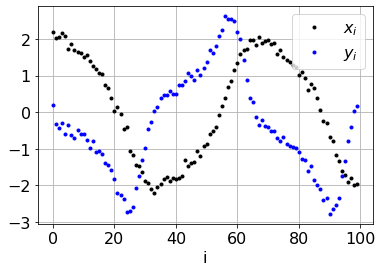

In [2]:
#NO MODIFICAR
x_i = np.load("curva_1.npy") #Carga de curva 1
y_i = np.load("curva_2.npy") #Carga de curva 2

plt.plot(x_i, 'k.', label=r'$x_i$')
plt.plot(y_i, 'b.', label=r'$y_i$')
plt.legend(loc='best')
plt.xlabel('i')
plt.grid()
plt.show()

Gráfica audible: [Desmos](https://www.desmos.com/calculator/cnegdsgghv?lang=es)

Como podemos notar, las curvas no se parecen a alguna función conocida.

# Modelo propuesto

Se propone el siguiente modelo para ajustar las 2 curvas de forma conjunta:

\begin{align*}
    x_{i+1} &= \alpha_0 +\alpha_1\,x_i+\alpha_2\,y_i+\alpha_3\,x_i\,y_i\\
    y_{i+1} &= \beta_0 +\beta_1\,x_i+\beta_2\,y_i+\beta_3\,x_i^2\,y_i
\end{align*}

Para un conjunto equiespaciado de $i\in \{0,...,n\}$

Las ecuaciones anteriores para cada punto generan el siguiente sistema de ecuaciones sobre determinado:
\begin{align*}
    \alpha_0 +\alpha_1\,x_0+\alpha_2\,y_0+\alpha_3\,x_0\,y_0 &= x_{1}\\
    \beta_0 +\beta_1\,x_0+\beta_2\,y_0+\beta_3\,x_0^2\,y_0 &= y_{1}\\
    \alpha_0 +\alpha_1\,x_1+\alpha_2\,y_1+\alpha_3\,x_1\,y_1 &= x_{2}\\
    \beta_0 +\beta_1\,x_1+\beta_2\,y_1+\beta_3\,x_1^2\,y_1 &= y_{2}\\
    \vdots &= \vdots\\
    \alpha_0 +\alpha_1\,x_{n-1}+\alpha_2\,y_{n-1}+\alpha_3\,x_{n-1}\,y_{n-1} &= x_{n}\\
    \beta_0 +\beta_1\,x_{n-1}+\beta_2\,y_{n-1}+\beta_3\,x_{n-1}^2\,y_{n-1} &= y_{n}
\end{align*}

\begin{align*}
\mathbf{x} &= [\alpha_0, \alpha_1, \alpha_2, \alpha_3, \beta_0, \beta_1, \beta_2, \beta_3]^T\\
\mathbf{b} &= [x_1, y_1, x_2, y_2, \dots, x_n, y_n]^T
\end{align*}

Notar que tenemos 2 curvas $x, y$ donde cada punto es una función dependiente del punto anterior, es decir, $x_1 = f(x_0, y_0)$ y $y_1 = g(x_0, y_0)$, i.e.:


\begin{align*}
    (1)\;x_{1} &= f(x_0, y_0) = \alpha_0 +\alpha_1\,x_0+\alpha_2\,y_0+\alpha_3\,x_0\,y_0\\
    (2)\;y_{1} &= g(x_0, y_0) = \beta_0 +\beta_1\,x_0+\beta_2\,y_0+\beta_3\,x_0^2\,y_0
\end{align*}

Por lo tanto $\mathbf{x}$ es el vector de coeficientes que queremos encontrar para ajustar el modelo anterior a los datos. $\mathbf{b}$ corresponde al lado derecho del sistema.



# Preguntas de desarrollo:




## Pregunta 1: (20 puntos)

Diseñe una función que tome como input los arreglos $x_i = [x_0, x_1, ..., x_n]$ e $y_i=[y_0, y_1, ..., y_n]$ y retorne la matriz $A$ y el vector $\mathbf{b}$, donde $A$ representa el sistema de ecuaciones sobre determinado asociado al modelo propuesto, y $\mathbf{b}$  es el lado derecho de la ecuación.

In [58]:
"""
input
x_i    : (array) array valores x_i: [x_0, x_1, ..., x_n]
y_i    : (array) array valores y_i: [y_0, y_1, ..., y_n]

output
A      : (array) arreglo bidimensional del sistema (lado izquierdo)
b      : (array) arreglo del lado derecho
"""
def over_matrix(x_i, y_i):
    A = np.empty((0, 8))
    b = np.array([])
    zeros = np.zeros(4)
    
    for i in range(len(x_i)):
        xn = np.array([1, x_i[i], y_i[i], x_i[i]*y_i[i]])
        yn = np.array([1, x_i[i], y_i[i], x_i[i]*x_i[i]*y_i[i]])
        
        A = np.append(A, [np.append(zeros, xn)], axis=0)
        A = np.append(A, [np.insert(zeros, 0, yn)], axis=0)
        
        if i > 0:
            b = np.append(b, [x_i[i], y_i[i]])
        
    return A,b

## Pregunta 2: (15 puntos)

Diseñe una función que tome como input los arreglos $A$; matriz que representa el sistema de ecuaciones sobre determinado del modelo propuesto, y $\mathbf{b}$; array de valores $x_{i+1}$, $y_{i+1}$: $[x_1, y_1, ..., x_n, y_n]$ asociado al modelo propuesto. La función debe retornar un arreglo ***coef*** con los coeficientes $[\alpha_0, \alpha_1, \alpha_2, \alpha_3, \beta_0, \beta_1, \beta_2, \beta_3]$ que ajustan mejor el modelo a los puntos dados,

Notar que de la forma que fue construido y planteado el sistema de ecuaciones se obtienen los coeficientes para ambas curvas simultáneamente.

In [ ]:
"""
input
A      : (array) arreglo bidimensional con valores obtenidos en la pregunta anterior
b      : (array) arreglo de valores conocidos (lado derecho de la ecuación)

output
coef      : (array) arreglo solución del sistema
"""
def minimos_cuadrados(A, b):
    #
    # Aquí va su código
    #
    return coef

## Pregunta 3 (20 puntos):

Cree una función que tome como input un arreglo **coef**, con los coeficientes obtenidos en la pregunta anterior, y un punto de partida inicial, i.e.: ***x_inicial*** e ***y_inicial***, y $m$ como el número de puntos a predecir, con $m<=100$. Además recibe el parámetro ***curve_choose***, el cual es un número booleano que de valer 0 la función calculará las predicciones para la curva 1 ($x$) y en caso contrario calculará las predicciones para la curva 2 ($y$). La función debe retornar un array ***pred*** con las predicciones pedidas para los $m$ puntos.

+ Hint 1: Mirar las ecuaciones planteadas en el modelo.
+ Hint 2: Los datos $x_{i+1}$ e $y_{i+1}$ se calculan con
los valores del paso anterior $x_i$ e $y_i$, por lo que para obtener todos los puntos se debe hacer algo como un "Pipeline".

In [ ]:
"""
input
coef          : (array) arreglo con los coeficientes obtenidos en pregunta 2
x_init        : (float) valor actual de x
y_init        : (float) valor actual de y
m             : (uint) cantidad de puntos a pronosticar
curve_choose  : (boolean) número que vale 0 en caso de hacer predicciones para curva 1, y en caso contrario hacer predicciones para curva 2

output
pred          : (array) arreglo con las predicciones del modelo según curve_choose partiendo desde los valores iniciales entregados
"""
def pred_model(x_init, y_init, m, coef, curve_choose):
    #
    # Aquí va su código
    #
    return pred

## Pregunta 4 (20 puntos):

Supongamos que ahora tenemos disponible:

+ Valores que predecimos para $x_i$ con la función ***pred_model*** con ***curve_choose*** = 0, $m = 100$.

No tenemos disponible:

+ Valores que predecimos para $y_i$ con la función ***pred_model*** con ***curve_choose*** = 1, $m = 100$.

La idea es poder aproximar $y_i$ usando una aproximación, para ello se sugiere hacer lo siguiente: Tomar cada valor $x_{i+1}$ y restar $x_{i}$, a estas "pendientes" que van quedando se les llamara $\hat{y_i}$.

Por ejemplo para las primeras 2 pendientes: $\hat{y_i} = [x_{1} - x_{0}, x_{2}-x_{1} ...]$

Si ahora decimos que tenemos acceso a los valores predichos para $y_i$ con la función ***pred_model*** con ***curve_choose*** = 1, $m = 100$, y comparamos los resultados con $\hat{y_i}$ notaremos una gran diferencia, por lo que, tenemos que buscar una forma de encontrar una constante ***C*** tal que se cumpla lo siguiente:

\begin{equation*}
    C\hat{y_{i}} = y_i
\end{equation*}

Lo cual nuevamente se transforma en un problema de mínimos cuadrados:

\begin{align*}
    C\hat{y_{1}} &= y_1\\
    C\hat{y_{2}} &= y_2\\
    C\hat{y_{3}} &= y_3\\
    C\hat{y_{4}} &= y_4\\
                &...\\
    C\hat{y_{99}} &= y_99
\end{align*}

El objetivo de esta función es encontrar la $C$ que ajuste mejor nuestro modelo artificial con diferencias, al modelo que se predijo originalmente.

La función recibe como input ***x_i_pred*** con valores predichos para $x_i$ con la función ***pred_model*** con ***curve_choose*** = 0, $m = 100$, y retorna como output ***C***, con el valor de la constante que mejor ajusta lo pedido.

Considere para las predicciones de ***x_i_pred*** usar los valores iniciales $x_0 = 2.1764052345967664$, e $y_0 = 0.18831506970562545$. Los mismos valores iniciales se usarán para calcular los valores predichos de $y_i$ al formar el nuevo modelo.

In [ ]:
"""
input
x_i_pred    : (array) array con predicciones para la curva 1(x_i) para 100 puntos, tomando como datos iniciales 

output
C      : (double) número con el valor de constante que ajusta mejor el modelo de diferencias, al modelo de mínimos cuadrados original
"""
def curve_approach(x_i_pred):
    #
    # Aquí va su código
    #
    return C
"""Ejemplo de llamada a esta función:
A,b = over_matrix(x_i, y_i)
coef = minimos_cuadrados(A, b)
x_i_pred = pred_model(2.1764052345967664, 0.18831506970562545, 100, coef, 0)
C = curve_approach(x_i_pred)
print(C)
...
"""

## Pregunta 5 (15 puntos): 
A continuación se presenta una función que muestra pronósticos realizados a partir del modelo ajustado en la pregunta 2. Estas predicciones son generadas gracias a los coeficientes del modelo, a los cuales además se les agregan perturbaciones en forma de ruido gaussiano de media 0 y desviación estándar 0.01.

Modifique la función que está a continuación para que calcule la desviación estándar de las predicciones con perturbaciones para cada punto $i\in \{n+1,...N\}$, donde $N$ es el horizonte de predicción.

Lo anterior significa: Sea $k$ el número de perturbaciones, y sea $x_i^k$ una predicción de superíndice $k$ de $x_i$ perturbada. Se pide que para cada punto $i$ se calcule la desviación estándar de todas las perturbaciones $k$.


In [ ]:
"""
input
x      : (array) arreglo x_i
y      : (array) arreglo y_i
coef   : (array) arreglo de coeficientes
N      : 
k      : 

output
sdx    : (array) arreglo de las desviaciones estándar para cada punto i de x
sdy    : (array) arreglo de las desviaciones estándar para cada punto i de y
"""
def disturbed(x,y,coef, N, k):    
               
    """ 
    Hint 1: Se recomienda crear una estructura de datos
    para almacenar las curvas perturbadas.
    """    
    np.random.seed(0) 
    for tmp in range(k):
        xdo,ydo=pred_model(x[N-1],y[N-1],N+1,coef*(1+np.random.normal(0,0.01,8)))
        
        # Desviaciones
        """ 
        Hint 2: Almacenar convenientemente las perturbaciones xdo e ydo.
        """    
        
    """ 
    Hint 3: Calcule las desviaciones de las perturbaciones almacenadas.
    """    
    sdx,sdy=...
    return sdx,sdy

# Pregunta 6 (15 puntos)
Luego de encontrar la desviación estándar en cada paso de predicción para ambas curvas $x,y$ perturbadas ***k*** veces, aproxime la curva resultante $sdx$ usando mínimos cuadrados con el siguiente modelo:
$$ \alpha_0 + \alpha_1\,j = sdx_j$$

Donde $j$ es el paso a partir de la nueva data pronosticada en las preguntas anteriores.

La función recibe como input: $A$ la matriz que representa el lado izquierdo del sistema de mínimos cuadrados que se propone, y $b$ el arreglo de valores $sdx_i$. Se deben retornar los coeficientes encontrados.


In [ ]:
"""
input
A      : (array) arreglo bidimensional sobre determinado
b      : (array) arreglo de valores sdx_i: [sdx_1, sdx_2, ..., sdx_m]

output
coef   : (array) arreglo solución del sistema
"""
def minimos_lin(A, b):
    #
    # Aquí va su código
    #
    return coef

# Pregunta 7 (5 puntos)

De las siguientes alternativas relacionadas con la tarea escoja la que considere correcta.



In [ ]:
# Con respecto a su implementación de los algoritmos:
def alternativas():
    resp = {
            "a" : "En la pregunta 4 es conveniente usar esa aproximación, ya que la complejidad temporal del algoritmo de aproximación es mucho menor que usar un modelo de minimos cuadrados",
            "b" : "El modelo lineal propuesto en la pregunta 6 es una buena aproximación de la desviación estándar de las curvas perturbadas",
            "c" : "En la pregunta 3, no es conveniente predecir más de 100 puntos hacia adelante, ya que el modelo planteado fue ajustado solo con 100 puntos inicialmente"
    }
    # Dentro de las comillas va la alternativa escogida: a || b || c
    return resp['x'] # Debe reemplazar 'x' por la alternativa seleccionada.